In [115]:
import numpy as np
import pandas as pd
import re
import nltk

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [62]:
data = pd.read_csv("/content/Adarsh1_Analysis.csv")

In [63]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [64]:
data.tail()

,id,label,tweet
21382,21383,0,ooh it's your bd ?? bih day nelly
21383,21384,0,#increase #profit #hits #sales 1 - 24 tweets a...
21384,21385,0,"are you on if not, check out my next post #..."
21385,21386,1,how is it that a man comes in last in a race b...
21386,21387,0,@user @user they wanna be taken serious but th...


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21387 entries, 0 to 21386
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      21387 non-null  int64 
 1   label   21387 non-null  int64 
 2   tweet   21387 non-null  object
dtypes: int64(2), object(1)
memory usage: 501.4+ KB


In [66]:
data.shape

(21387, 3)

In [67]:
data.describe()

,id,label
count,21387.000000,21387.000000
mean,10694.000000,0.069201
std,6174.039439,0.253801
min,1.000000,0.000000
25%,5347.500000,0.000000
50%,10694.000000,0.000000
75%,16040.500000,0.000000
max,21387.000000,1.000000


In [68]:
def pattern_remove(in_text,in_pattern):
  a = re.findall(in_pattern, in_text)
  for characters in a:
    in_text = re.sub(characters, "", in_text)
  return in_text


In [69]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [70]:
data.tail()

,id,label,tweet
21382,21383,0,ooh it's your bd ?? bih day nelly
21383,21384,0,#increase #profit #hits #sales 1 - 24 tweets a...
21384,21385,0,"are you on if not, check out my next post #..."
21385,21386,1,how is it that a man comes in last in a race b...
21386,21387,0,@user @user they wanna be taken serious but th...


In [71]:
data['new_tweet'] = np.vectorize(pattern_remove)(data['tweet'], "@[\w]*")

In [72]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [73]:
data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z0-9 ]", "", regex=True)

In [74]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [75]:
data['new_tweet'] = data['new_tweet'].apply(lambda b : " ".join([c for c in b.split() if len(c)>3]))


In [76]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant cause they dont offer ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model love take with time
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [77]:
used_words = data['new_tweet'].apply(lambda b : b.split())
used_words.head()

,new_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, lyft, credit, cant, cause, they, dont..."
2,"[bihday, your, majesty]"
3,"[model, love, take, with, time]"
4,"[factsguide, society, motivation]"


In [78]:
for i in range(len(used_words)):
  used_words[i] = ' '.join(used_words[i])

data['new_tweet'] = used_words


In [79]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant cause they dont offer ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model love take with time
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [80]:
freq_words = " ".join([words for words in data['new_tweet']])

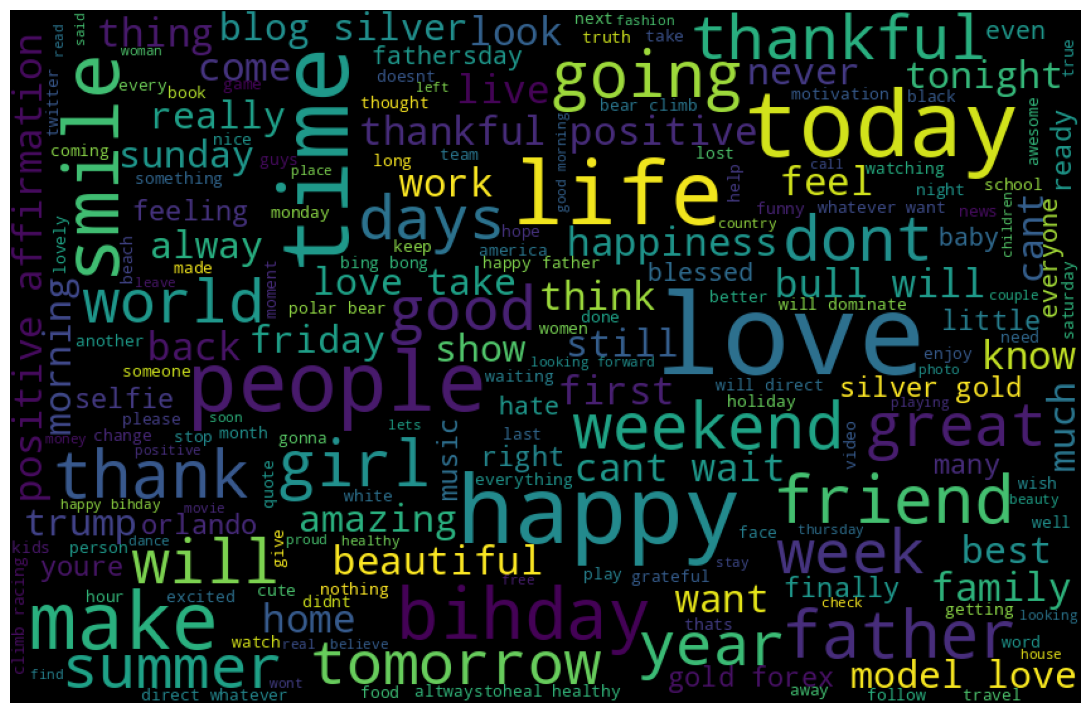

In [81]:
cloud_word = WordCloud(width=850, height=550, random_state=50, max_font_size=90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show()

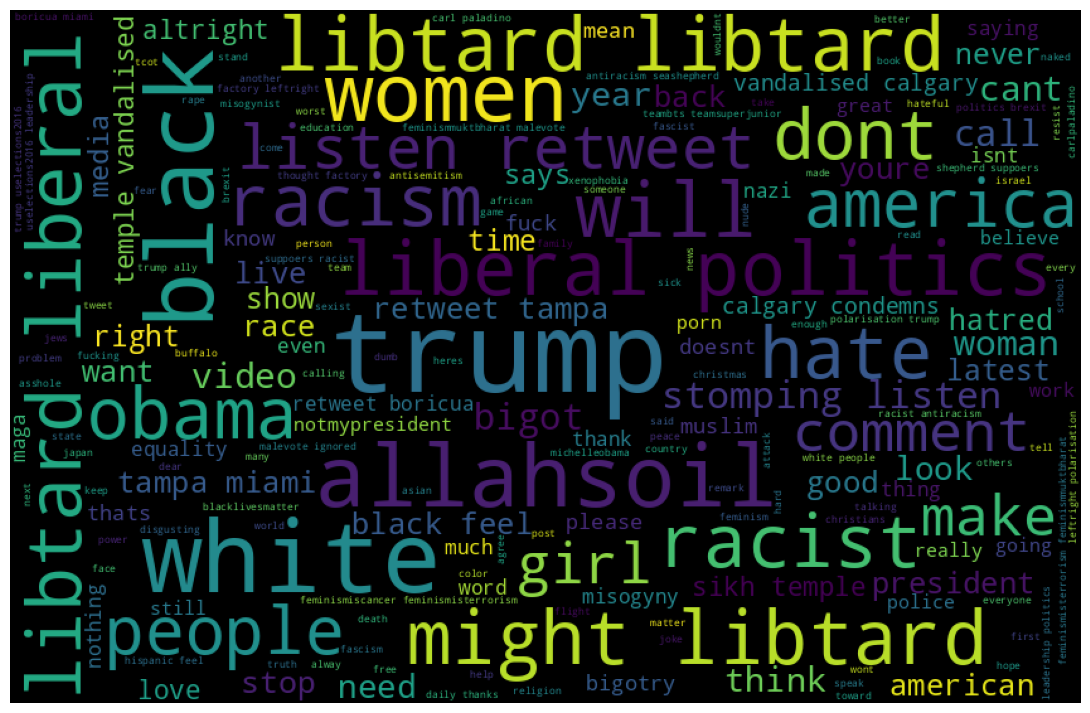

In [82]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==1]])

cloud_word = WordCloud(width=850, height=550, random_state=50, max_font_size=90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show()

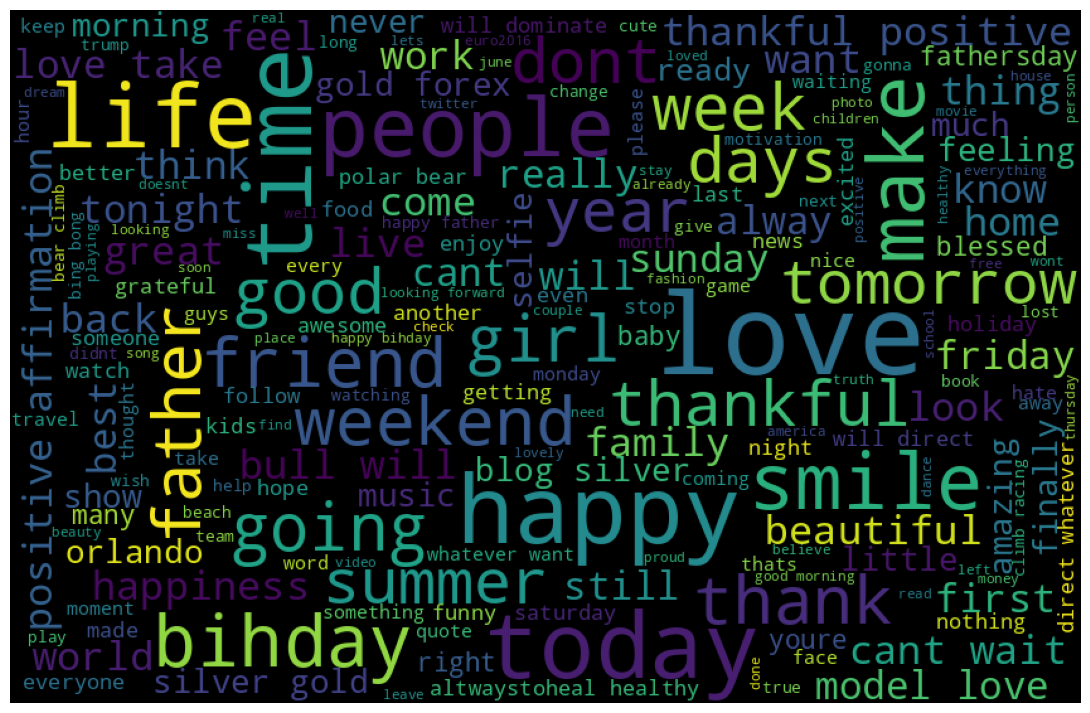

In [83]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==0]])

cloud_word = WordCloud(width=850, height=550, random_state=50, max_font_size=90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show()

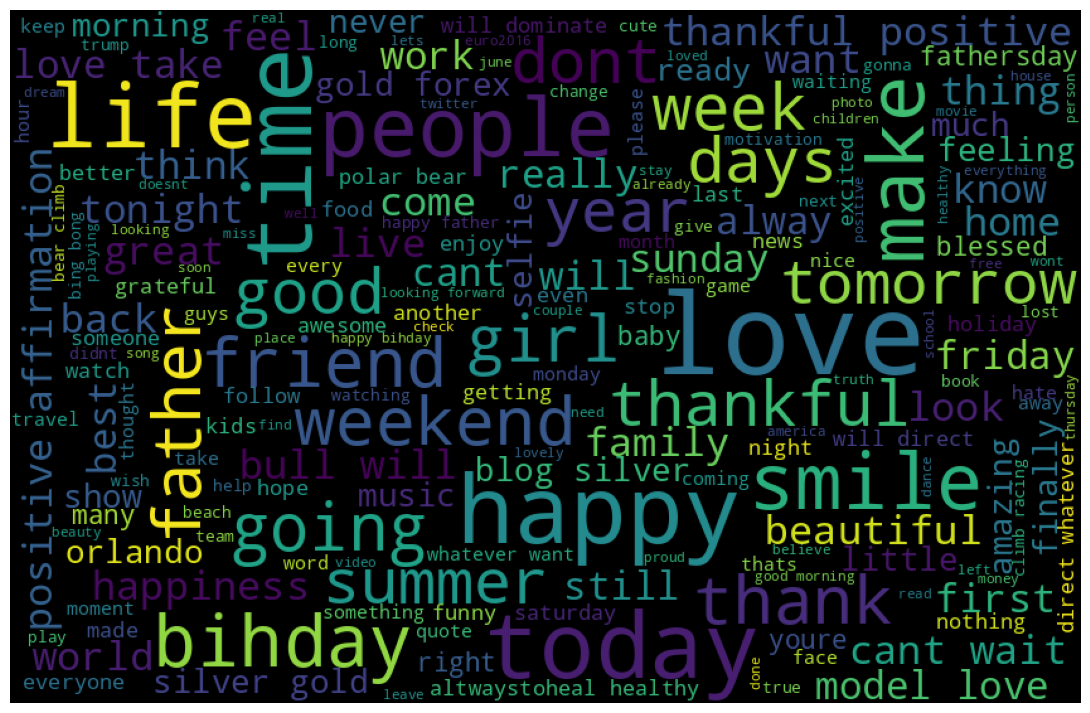

In [84]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==False]])

cloud_word = WordCloud(width=850, height=550, random_state=50, max_font_size=90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show()

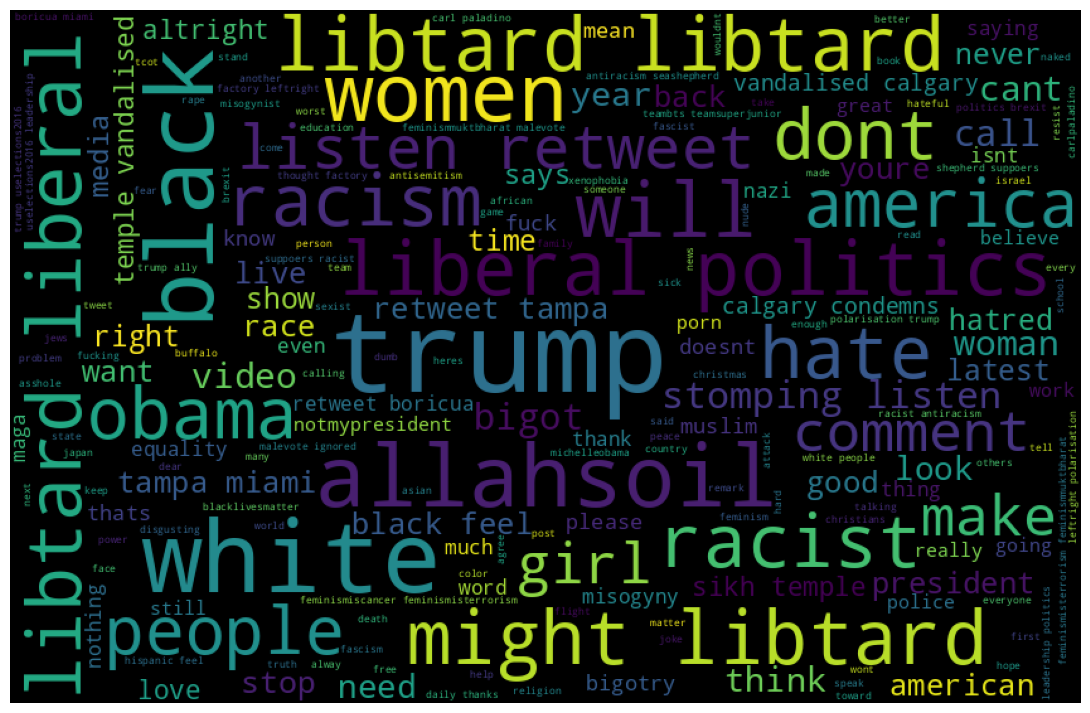

In [85]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==True]])

cloud_word = WordCloud(width=850, height=550, random_state=50, max_font_size=90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show()

In [105]:
def get_hashtag(tweets):
  hash_tag = []
  for tweet in tweets:
    hash_tag.append(re.findall(r"#(\w+)", tweet))
  return hash_tag

In [96]:
hashtag_False = get_hashtag(data['new_tweet'][data['label']==1])
hashtag_True = get_hashtag(data['new_tweet'][data['label']==0])

In [97]:
hashtag_False[:10]


[[], [], [], [], [], [], [], [], [], []]

In [89]:
hashtag_True[:10]

[[], [], [], [], [], [], [], [], [], []]

In [90]:
hashtag_False = sum(hashtag_False, [])
hashtag_True = sum(hashtag_True, [])

In [91]:
hashtag_True[:10]

[]

In [92]:
hashtag_False[:10]

[]

In [107]:
hashtag_True = [hashtag for sublist in hashtag_True for hashtag in sublist]

In [108]:
tweet_count = nltk.FreqDist(hashtag_True)
e = pd.DataFrame({'name_hashtag':list(tweet_count.keys()),
                  'total_count' : list(tweet_count.values())})


In [122]:
e.head()

,name_hashtag,total_count


In [109]:
e = e.nlargest(columns='total_count', n=10)

In [116]:
fig = px.bar(e, x='name_hashtag', y='total_count', color ='name_hashtag')
fig.show()

In [119]:
hashtag_False = [hashtag for sublist in hashtag_False for hashtag in sublist]
tweet_count = nltk.FreqDist(hashtag_False)
e = pd.DataFrame({'name_hashtag':list(tweet_count.keys()),
                  'total_count' : list(tweet_count.values())})


In [123]:
e.head()

,name_hashtag,total_count


In [120]:
e = e.nlargest(columns='total_count', n=10)

In [121]:
fig = px.bar(e, x='name_hashtag', y='total_count', color ='name_hashtag')
fig.show()